#Solving stochastic (binary) bandits with Exp3, UCB, and Thompson sampling

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [136]:
K = 10 #number of arms
T = 10000 #timesteps
p_reward = np.random.uniform(size = K) #probabilities of reward 1
print('Reward probabilities: ', p_reward)

('Reward probabilities: ', array([ 0.16124432,  0.16917318,  0.41040228,  0.3032692 ,  0.34640959,
        0.50982824,  0.43923882,  0.87783091,  0.51762656,  0.34049383]))


In [137]:
#Exp3
gamma = 0.1
w = np.ones(K)
regret = 0
exp3_regret = [regret]
for t in range(T):
    a,p_action = sample_action(w, t)
    r_raw = np.random.binomial(1,p_reward[a])
    r_imp_weighted = r_raw / p_action
    w[a] = w[a] * np.exp(gamma* r_imp_weighted/K)
    regret = regret + max(p_reward)-p_reward[a]
    exp3_regret.append(regret)
print('Weight vector: ', w)

#Sample an action given weight vector
def sample_action(w, t):
    p = (1-gamma) * w / sum(w) + gamma/K
    a = np.random.choice(K,p=p)
    return a,p[a]

('Weight vector: ', array([  1.49257005e+07,   7.50881536e+08,   7.49426575e+16,
         2.49966143e+10,   5.70565938e+11,   1.29783737e+25,
         7.20192330e+19,   3.25967318e+38,   1.08589840e+21,
         1.19127991e+15]))


In [138]:
#UCB
regret = 0
ucb_regret = [0]
avg_rewards = np.ones(K)/2
n_i = np.zeros(K)
for t in range(T):
    ucb = avg_rewards + np.sqrt(2*math.log(t+1)*1./np.maximum(n_i, np.ones(K)))
    a = np.argmax(ucb)
    r = np.random.binomial(1,p_reward[a])
    avg_rewards[a] = (n_i[a]*avg_rewards[a]+r)/(n_i[a]+1)
    n_i[a] = n_i[a]+1
    regret = regret + max(p_reward)-p_reward[a]
    ucb_regret.append(regret)

In [139]:
#Thompson-sampling
regret = 0
thompson_regret = [0]
alpha = np.ones(K)
beta = np.ones(K)
for t in range(T):
    sampled_arms = np.zeros(K)
    for k in range(K):
        sampled_arms[k] = np.random.beta(alpha[k],beta[k])
    a = np.argmax(sampled_arms)
    r = np.random.binomial(1,p_reward[a])
    if r==1:
        alpha[a] = alpha[a] + 1 #increment the corresponding alpha
    else:
        beta[a] = beta[a] + 1 #increment the corresponding beta
    regret = regret + max(p_reward)-p_reward[a]
    thompson_regret.append(regret)

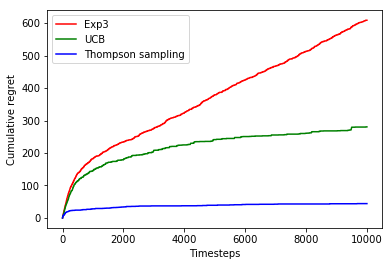

In [142]:
plt.plot(exp3_regret,'r',label='Exp3')
plt.plot(ucb_regret,'g',label='UCB')
plt.plot(thompson_regret,'b',label='Thompson sampling')
plt.ylabel('Cumulative regret')
plt.xlabel('Timesteps')
plt.legend()
plt.show()